In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from fastai import *
from fastai.text import *
from fastai.callbacks import *

In [3]:
import pandas as pd

In [4]:
path=Path('D:/Downloads/NLP')

In [5]:
path

WindowsPath('D:/Downloads/NLP')

In [6]:
train = pd.read_csv(path/'train.csv'); train.head()

,tweet,Target
0,Charlie Jacobs got confused about the ice buck...,2
1,@JuanNDaCut @ShareA40Ounce she playin pussy ho...,1
2,I be telling Mcgirt music ain't enough.You got...,1
3,@IHateStevenSing\nI ain't to show bout dem col...,2
4,RT @blessedarti: Y'all claim you want a good &...,1


In [8]:
data_lm = TextLMDataBunch.from_csv(path, 'train.csv', text_cols='tweet')

In [9]:
learn_lm = language_model_learner(data_lm, AWD_LSTM, drop_mult=1.0)

In [10]:
TEXT = "you just want some attention hoe"
N_WORDS = 40
N_SENTENCES = 2
print("\n".join(learn_lm.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

you just want some attention hoe = 
 
  It should be a challenge to try to make a big drop . a spring or even a ball , the fall is a good lot that you move there and you can ' t get that
you just want some attention hoe = 
 
  " a trick ? " is the word that the word " break " ( Latin for " head " ) or " you " ( a , c ) is used for the amount of time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


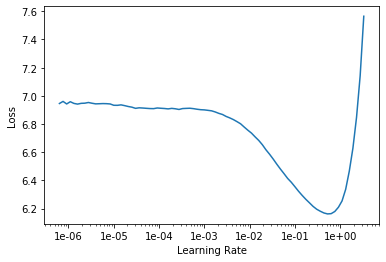

In [11]:
learn_lm.lr_find()
learn_lm.recorder.plot()

In [12]:
bs=32

In [13]:
lr = 1e-2/2
lr *= bs/48
learn_lm.to_fp16();

In [14]:
learn_lm.fit_one_cycle(1, lr*10, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.970833,4.090474,0.285714,00:15


In [15]:
learn_lm.unfreeze()
learn_lm.fit_one_cycle(10, lr, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.291836,3.908677,0.314286,00:21
1,4.184470,3.828676,0.300000,00:21
2,4.028078,3.645935,0.342857,00:21
3,3.815158,3.731553,0.314286,00:21
4,3.564655,3.782034,0.328571,00:21
5,3.267389,3.767240,0.271429,00:21
6,2.967950,3.828380,0.285714,00:23
7,2.700891,3.874556,0.314286,00:25
8,2.486704,3.947047,0.285714,00:26
9,2.382738,3.982522,0.300000,00:26


In [16]:
learn_lm.save('ft_lm')

In [17]:
learn_lm.save_encoder('ft_enc')

In [18]:
data_clas = TextClasDataBunch.from_csv(path, 'train.csv',test='test.csv', text_cols='tweet', label_cols='Target', vocab=data_lm.vocab, bs=bs)

In [19]:
from fastai import *

In [20]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, metrics=[accuracy,FBeta(beta=1,average='weighted'),],)
learn.load_encoder('ft_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (13878 items)
x: TextList
xxbos xxunk yellow shirt hat turnt to da side,xxbos @deeznutsdoe you dirty little bitch,xxbos xxmaj my nephew keeps tryna kiss me and i 'm like bitch you got zero followers , xxunk yourself .,xxbos xxmaj xxunk is a bitch,xxbos xxmaj if you are nt going to stick to one garbage can for recycling i m not going to give a single fuck about where i m putting my trash .
y: CategoryList
2,1,1,1,1
Path: D:\Downloads\NLP;

Valid: LabelList (3470 items)
x: TextList
xxbos xxmaj rams too " xxunk : xxmaj lakers as a whole is trash xxup rt @80sbaby4life : xxmaj jordan xxmaj hill is trash . xxmaj play xxmaj davis and xxmaj xxunk more ",xxbos it might rain today , hmmm .. i do n't want to look like a pussy carrying an umbrella around but i also do n't want to risk my xxunk getting wet .,xxbos xxmaj you fucking fag “ xxunk : this is exactly what i am talking about 
 
  women are pigs http : / / t.co / xxunk ”,xxbos “ xxunk _ 

In [21]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


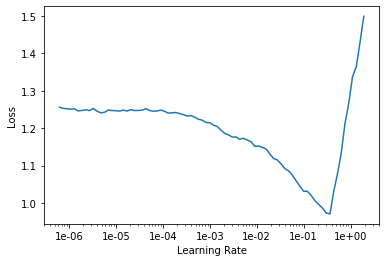

In [22]:
learn.recorder.plot()

In [23]:
learn.fit_one_cycle(1, 1e-4, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.946945,0.860278,0.717291,0.745512,02:49


In [24]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.348396,0.306419,0.895389,0.875941,02:51


In [25]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.295768,0.277978,0.899712,0.890344,03:02


In [26]:
learn.save('clas')

In [27]:
learn.freeze_to(-4)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.285206,0.280008,0.902882,0.896088,03:05
